<a href="https://colab.research.google.com/github/VeekshithaKulal/Machine-learning/blob/main/model_comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# read the file
import pandas as pd
df=pd.read_csv("/content/irrigation_prediction.csv")
df

,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,Clay,6.14,36.48,0.42,2.17,21.90,31.19,1167.70,4.01,1.97,Wheat,Vegetative,Rabi,Rainfed,Reservoir,4.73,Yes,1.98,South,Low
1,Silt,6.41,50.56,0.38,0.23,36.50,26.01,831.28,10.72,16.82,Maize,Flowering,Zaid,Canal,Groundwater,12.22,Yes,33.56,Central,Medium
2,Sandy,7.71,40.07,1.09,2.18,41.83,76.41,1844.45,7.75,19.03,Cotton,Harvest,Rabi,Drip,Reservoir,5.52,Yes,34.62,South,Low
3,Clay,5.96,12.75,1.56,0.40,37.22,43.32,306.26,8.90,11.44,Wheat,Sowing,Kharif,Canal,Reservoir,1.43,Yes,84.03,North,Medium
4,Clay,7.76,18.58,0.95,2.52,22.38,86.44,1875.63,10.39,11.26,Cotton,Sowing,Zaid,Canal,River,2.52,No,60.86,South,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Silt,7.01,26.67,0.86,0.76,27.61,52.20,1075.12,7.41,19.66,Sugarcane,Sowing,Kharif,Drip,Groundwater,2.62,Yes,92.44,South,Low
9996,Clay,5.40,49.44,0.90,1.19,34.03,52.31,1591.84,9.86,5.66,Maize,Sowing,Kharif,Rainfed,Groundwater,4.87,No,15.46,South,Low
9997,Loamy,4.97,60.63,0.99,1.30,36.68,68.16,2384.87,10.75,13.40,Potato,Harvest,Kharif,Canal,Groundwater,10.08,Yes,116.36,North,Low
9998,Loamy,7.12,44.33,1.56,1.08,31.50,64.83,2397.01,4.03,3.05,Sugarcane,Harvest,Kharif,Rainfed,Reservoir,11.11,Yes,118.17,East,Low


In [3]:
# Arranging categorival and numerical values.
numeric_cols=df.select_dtypes(include=["int64","float64"]).columns.tolist()
category_cols=df.select_dtypes(include=["object"]).columns.tolist()
numeric_cols,category_cols

(['Soil_pH',
  'Soil_Moisture',
  'Organic_Carbon',
  'Electrical_Conductivity',
  'Temperature_C',
  'Humidity',
  'Rainfall_mm',
  'Sunlight_Hours',
  'Wind_Speed_kmh',
  'Field_Area_hectare',
  'Previous_Irrigation_mm'],
 ['Soil_Type',
  'Crop_Type',
  'Crop_Growth_Stage',
  'Season',
  'Irrigation_Type',
  'Water_Source',
  'Mulching_Used',
  'Region',
  'Irrigation_Need'])

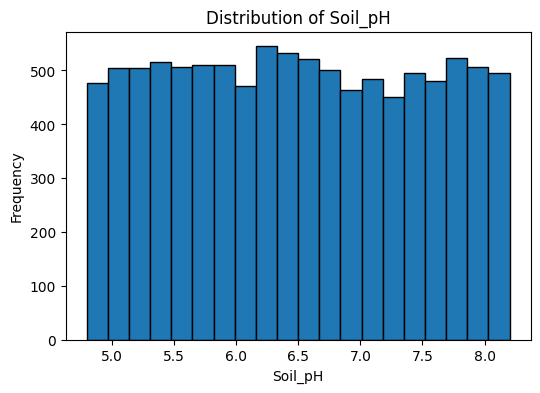

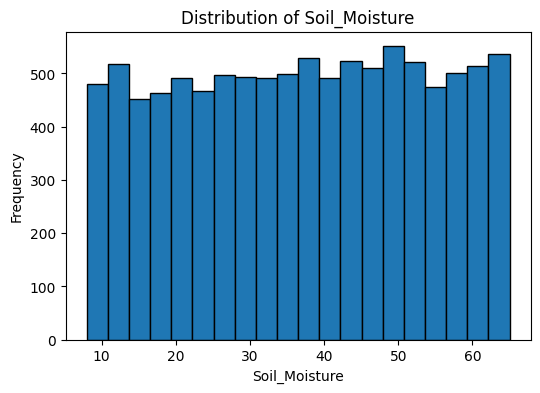

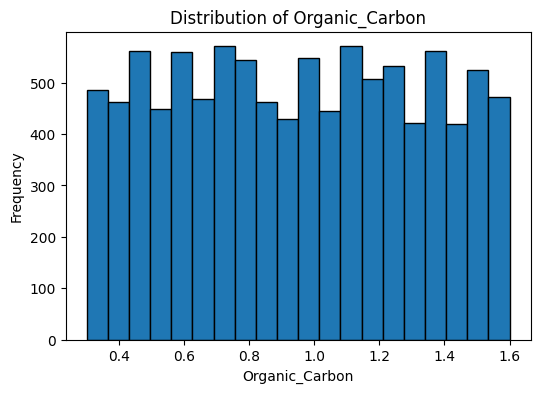

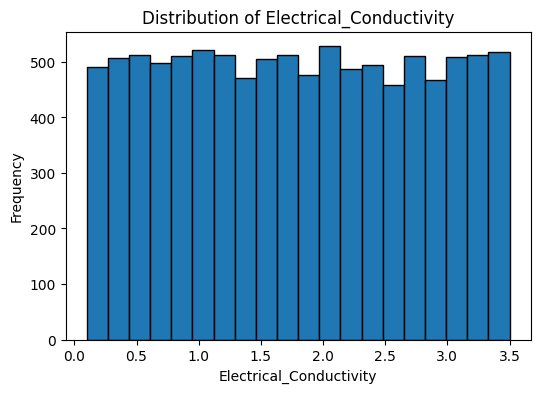

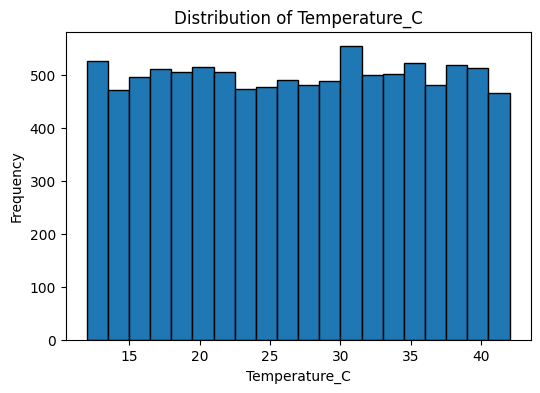

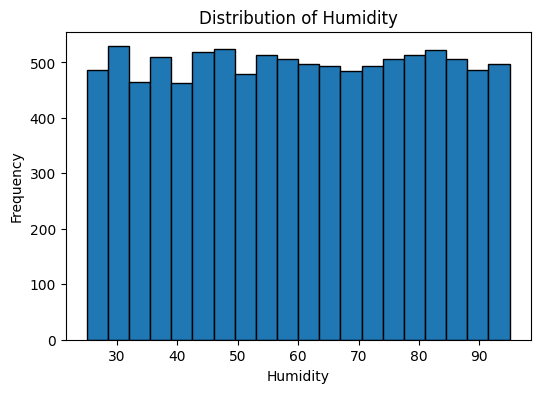

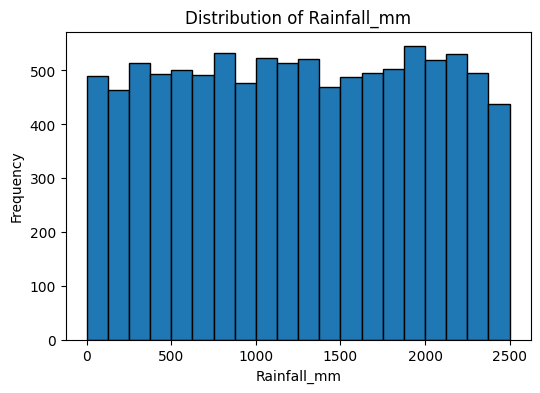

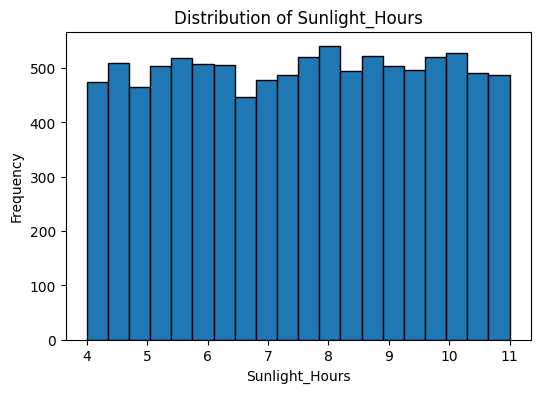

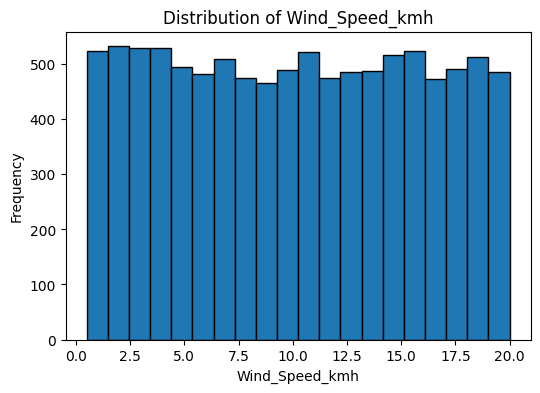

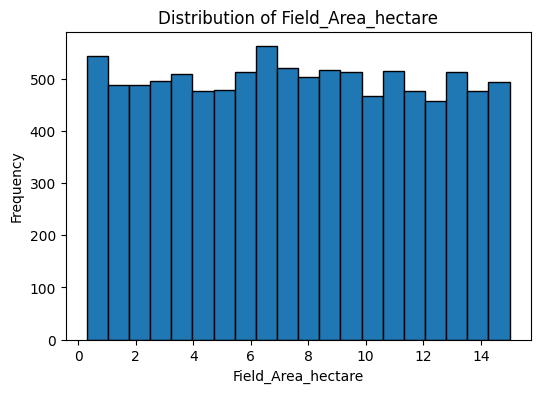

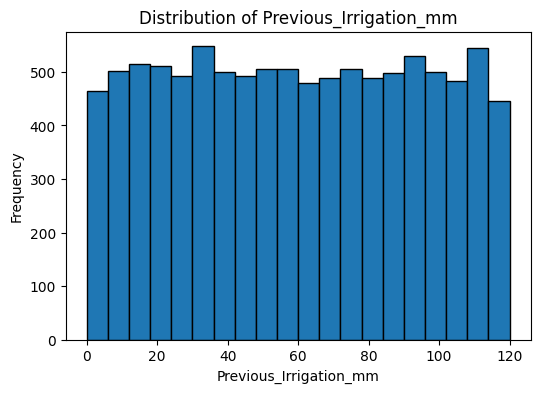

In [4]:
import matplotlib.pyplot as plt
for col in numeric_cols:
  plt.figure(figsize=(6,4))
  plt.hist(df[col],bins=20,edgecolor="black")
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

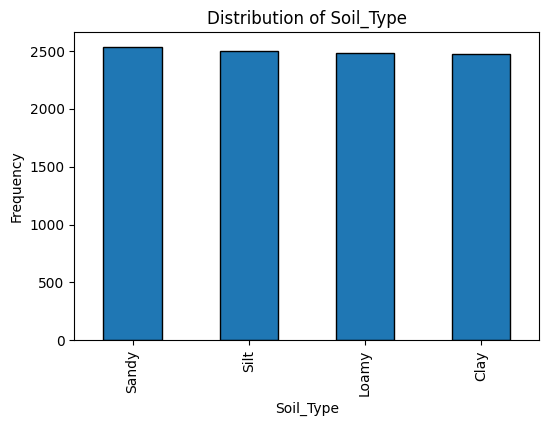

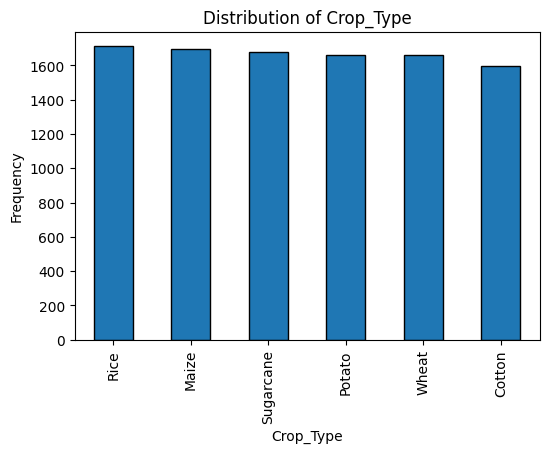

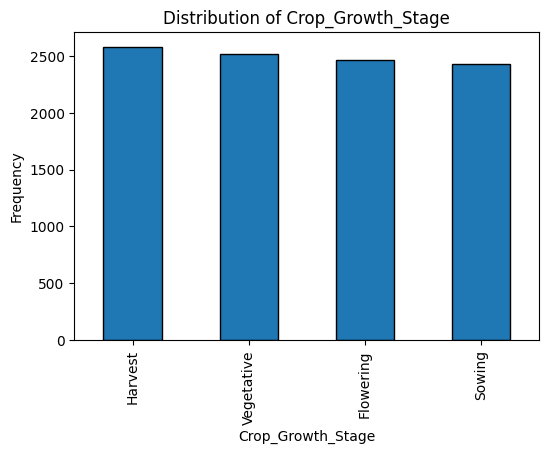

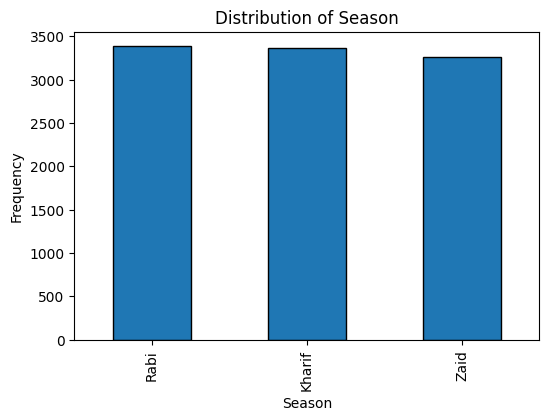

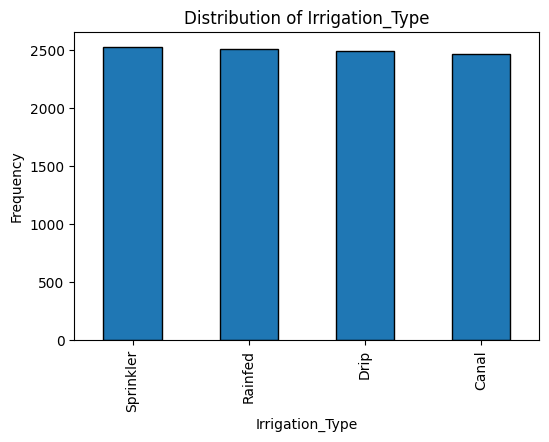

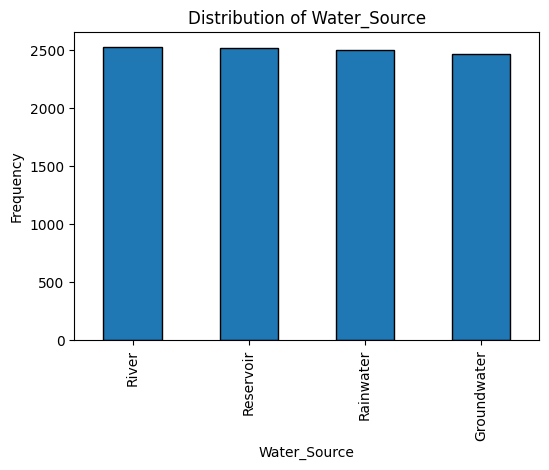

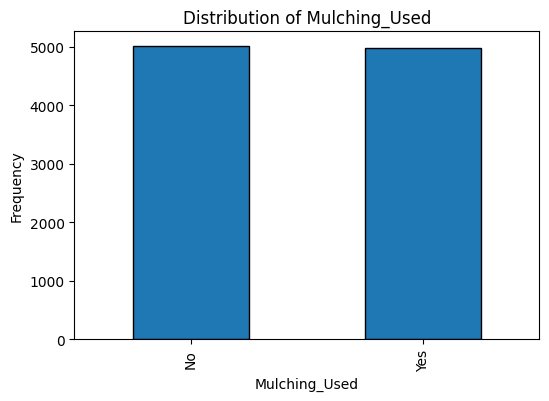

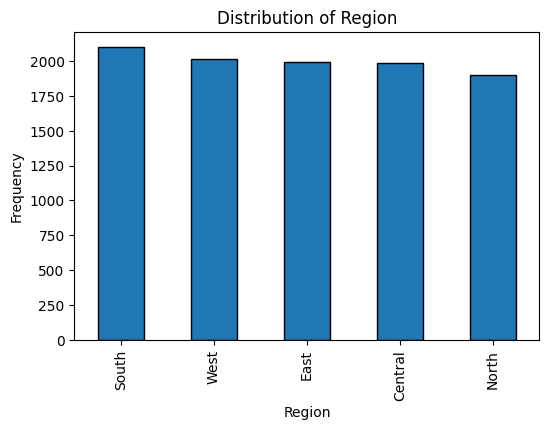

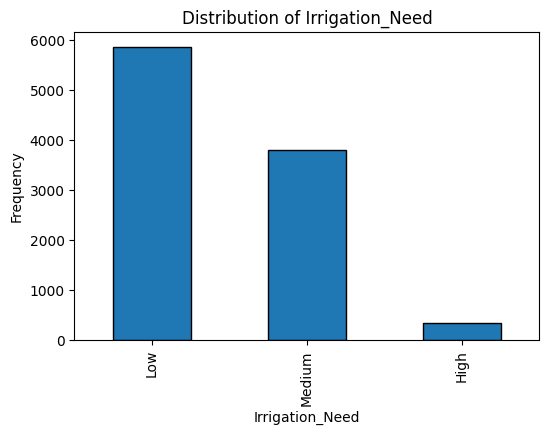

In [5]:
for col in category_cols:
    plt.figure(figsize=(6,4))

    df[col].value_counts().plot(
        kind='bar',
        edgecolor='black'
    )

    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

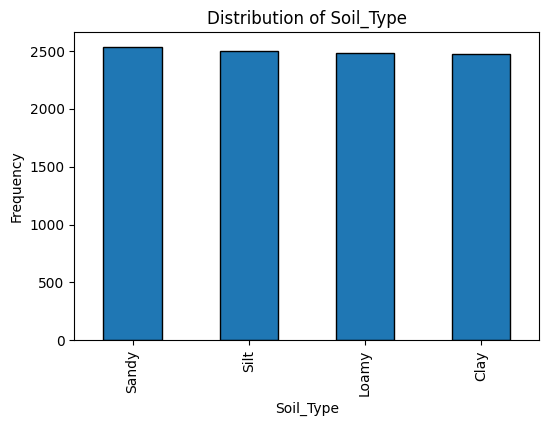

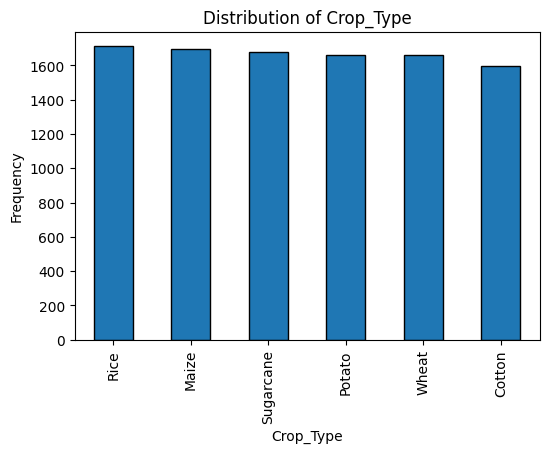

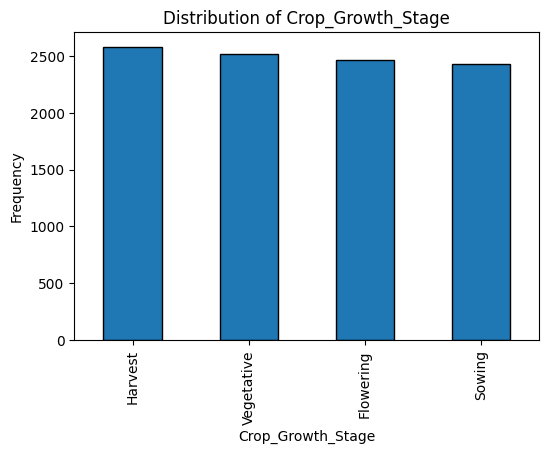

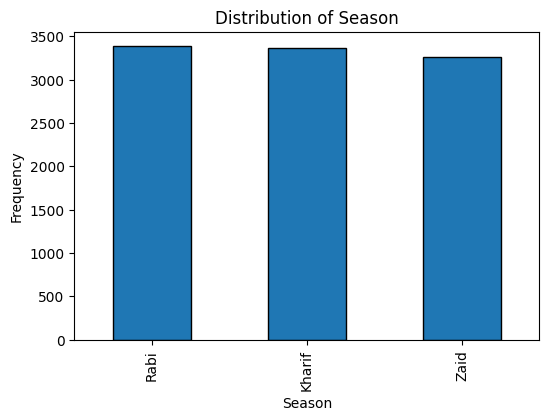

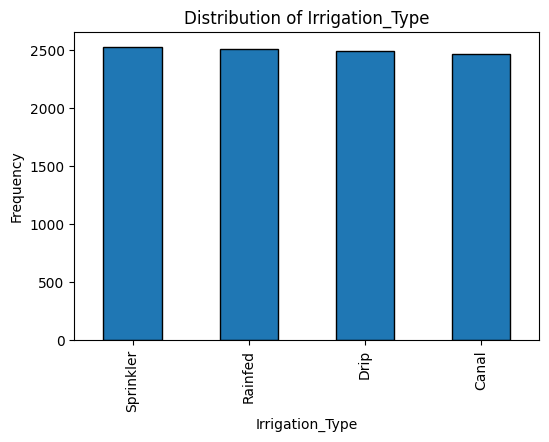

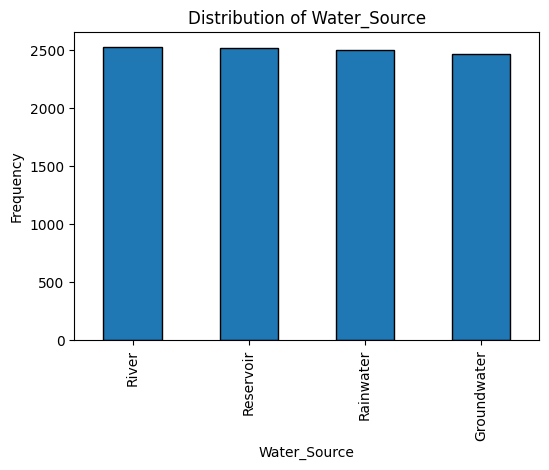

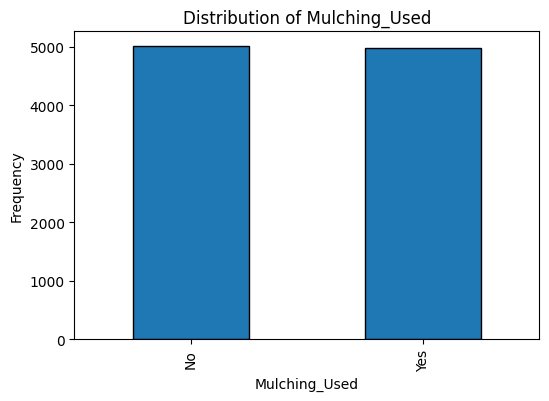

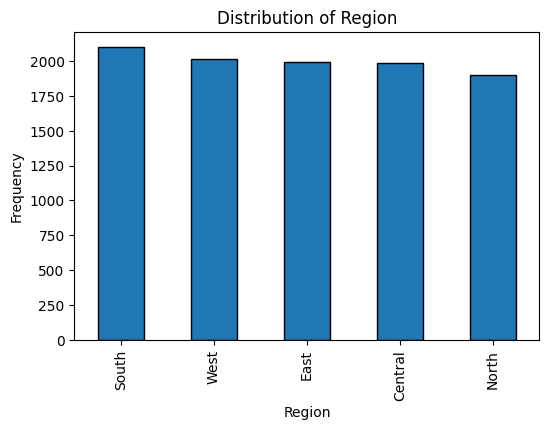

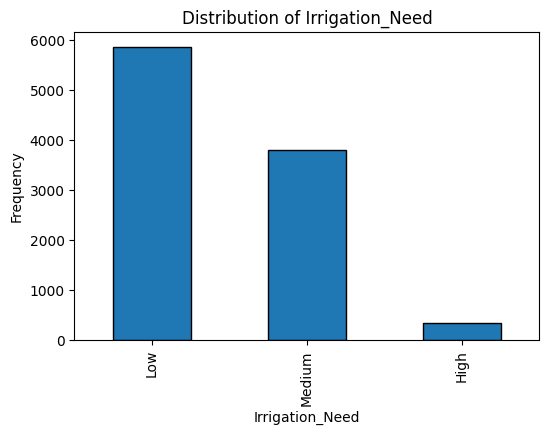

In [6]:
for col in category_cols:
    plt.figure(figsize=(6,4))

    df[col].value_counts().plot(
        kind='bar',
        edgecolor='black'
    )

    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

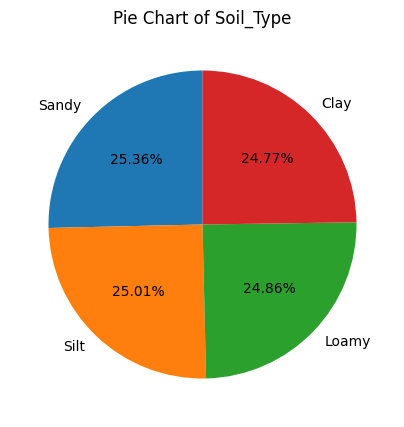

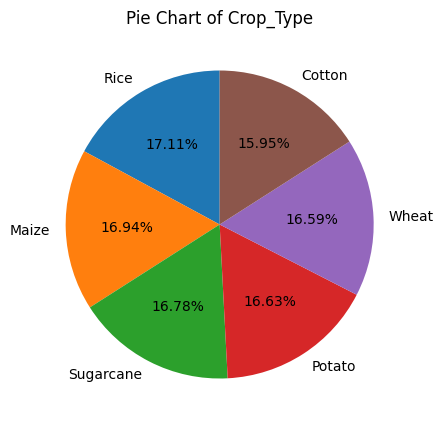

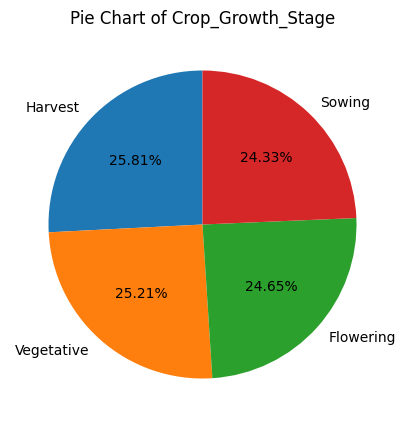

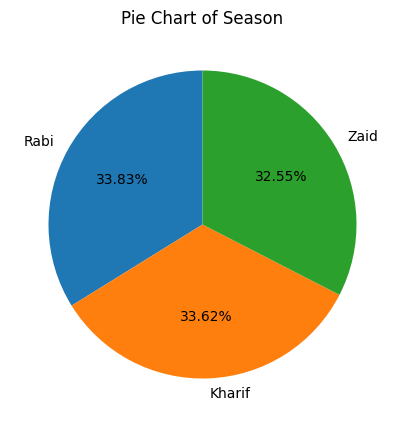

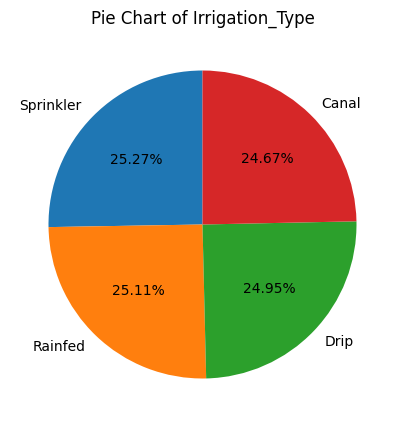

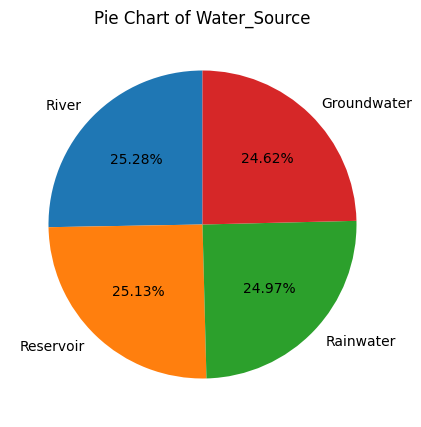

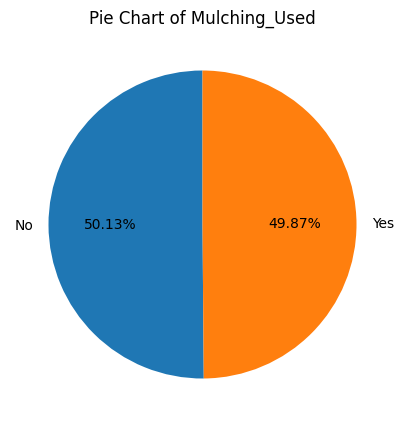

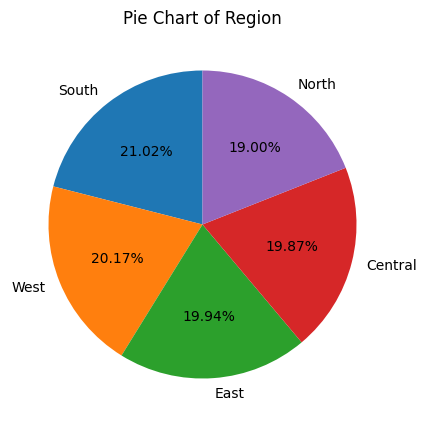

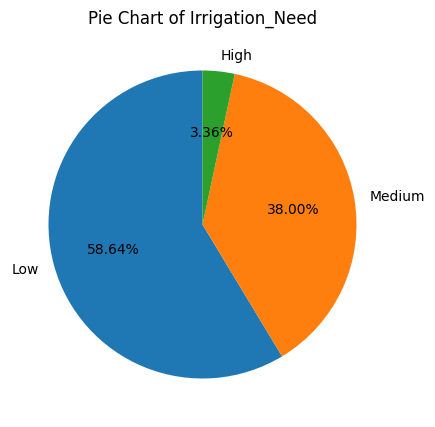

In [12]:
for col in category_cols:
  plt.figure(figsize=(5,5))
  df[col].value_counts().plot(
        kind="pie",
        autopct="%.2f%%",
        startangle=90
    )
  plt.title(f"Pie Chart of {col}")
  plt.ylabel("")   # remove default ylabel
  plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

label_encoders = {}

for col in category_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [17]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop(columns=["Irrigation_Need"])
y = df_encoded["Irrigation_Need"]

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

In [19]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

In [20]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred, average="weighted")
    })

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
# Classification report
report = pd.DataFrame(results)
report = report.sort_values(by="F1 Score", ascending=False)
report

,Model,Accuracy,Precision,Recall,F1 Score
3,Gradient Boosting,0.9965,0.996532,0.9965,0.996412
1,Decision Tree,0.9955,0.995512,0.9955,0.995504
2,Random Forest,0.9865,0.986823,0.9865,0.985616
4,AdaBoost,0.8905,0.914995,0.8905,0.885162
6,SVM,0.8150,0.788860,0.8150,0.801639
7,Naive Bayes,0.8060,0.809436,0.8060,0.792987
0,Logistic Regression,0.7220,0.719467,0.7220,0.714303
5,KNN,0.6660,0.644166,0.6660,0.648512
